In [1]:
!pip install git+https://github.com/single-cell-genetics/XClone

  Cloning https://github.com/single-cell-genetics/XClone to /tmp/pip-req-build-x5yu4z74
  Running command git clone --filter=blob:none --quiet https://github.com/single-cell-genetics/XClone /tmp/pip-req-build-x5yu4z74
  Resolved https://github.com/single-cell-genetics/XClone to commit 069a67f53b9a069b0ed583b9dfa8129fe67be7d3
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
%load_ext autoreload
%autoreload 2

import xclone
import anndata as an
import pandas as pd
import numpy as np
import scipy
print("scipy", scipy.__version__)

xclone.pp.efficiency_preview()

(Running XClone 0.3.10)
2025-06-22 15:35:25
scipy 1.15.3
[XClone efficiency] multiprocessing cpu total count in your device 12


In [40]:
RDR_file = "tumor2_rdr/matrix.mtx"
mtx_barcodes_file = "tumor2_rdr/barcodes.tsv" # cell barcodes
regions_anno_file = "tumor2_rdr/features.tsv" # feature annnotation
RDR_adata = xclone.pp.xclonedata(RDR_file,
                     'RDR',
                     mtx_barcodes_file,
                     genome_mode = "hg19_genes",
                     data_notes = None)

/home/sc5625/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [52]:
import scanpy as sc

old_adata = sc.read_h5ad("/home/sc5625/xclone_files/new_adata_t2_backup.h5ad")

In [ ]:
import pandas as pd

old_obs = old_adata.obs.copy()
old_obs["stripped_name"] = old_obs["obs_names"].astype(str).str.replace(r"\d+$", "", regex=True)
old_obs = old_obs.drop_duplicates(subset="stripped_name")
old_obs

,Type,cell_type,obs_names,stripped_name
0,Tumor,T,AAACATAAAGATGTATG1,AAACATAAAGATGTATG
1,Immune,N,AAACATAACTTTCAATA1,AAACATAACTTTCAATA
2,Tumor,T,AAACATAGAACCGGTTG1,AAACATAGAACCGGTTG
3,Immune,N,AAACATCGACTTTTACC1,AAACATCGACTTTTACC
4,Tumor,T,AAACATCTTGGCTCAAG1,AAACATCTTGGCTCAAG
...,...,...,...,...
3636,Immune,N,TTTTATTGGCGAAGATC2,TTTTATTGGCGAAGATC
3637,Immune,N,TTTTATTGTTAACTATC2,TTTTATTGTTAACTATC
3638,Immune,N,TTTTATTTCGGCATACG2,TTTTATTTCGGCATACG
3639,Tumor,T,TTTTATTTGACTATTAA2,TTTTATTTGACTATTAA


In [78]:
metadata_df = old_obs.set_index("stripped_name")[["Type", "cell_type"]]
RDR_obs = RDR_adata.obs.copy()
RDR_obs["matched_name"] = RDR_obs.index
RDR_obs = RDR_obs.merge(metadata_df, left_on="matched_name", right_index=True, how="left")
RDR_obs

,matched_name,Type,cell_type
AAACATAAAGATGTATG,AAACATAAAGATGTATG,Tumor,T
AAACATAAAGTAGGTCA,AAACATAAAGTAGGTCA,Tumor,T
AAACATAAATCCGTTGA,AAACATAAATCCGTTGA,Immune,N
AAACATAAATCCTGTAA,AAACATAAATCCTGTAA,Tumor,T
AAACATAACAAGGGATT,AAACATAACAAGGGATT,Tumor,T
...,...,...,...
TTTTATTTAAGGAGATC,TTTTATTTAAGGAGATC,NaN,NaN
TTTTATTTCGGCATACG,TTTTATTTCGGCATACG,Immune,N
TTTTATTTGACTATTAA,TTTTATTTGACTATTAA,Tumor,T
TTTTATTTGACTTTATT,TTTTATTTGACTTTATT,Immune,N


In [ ]:
RDR_adata.obs = RDR_obs
RDR_adata = RDR_adata[~RDR_adata.obs["Type"].isna()].copy()

In [24]:
AD_file = "tumor2_baf/3_baf_fc/xcltk.AD.mtx"
DP_file = "tumor2_baf/3_baf_fc/xcltk.DP.mtx"
mtx_barcodes_file = "tumor2_rdr/barcodes.tsv" # cell barcodes
# use default gene annotation
BAF_adata = xclone.pp.xclonedata([AD_file, DP_file], 'BAF',
                                 mtx_barcodes_file,
                                 genome_mode = "hg19_genes")

/home/sc5625/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
old_obs = old_adata.obs.copy()
old_obs["stripped_name"] = old_obs["obs_names"].astype(str).str.replace(r"\d+$", "", regex=True)
old_obs = old_obs.drop_duplicates(subset="stripped_name")

metadata_df = old_obs.set_index("stripped_name")[["Type", "cell_type"]]
BAF_obs = BAF_adata.obs.copy()
BAF_obs["matched_name"] = BAF_obs.index  # assume these are already stripped
BAF_obs = BAF_obs.merge(metadata_df, left_on="matched_name", right_index=True, how="left")



In [ ]:
BAF_adata.obs = BAF_obs
BAF_adata = BAF_adata[~BAF_adata.obs["Type"].isna()].copy()


From here, end preprocessing and start running xclone

RDR 
Configurations:
HMM_brk                        chr_arm
KNN_neighbors                  10
KNN_npcs                       40
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_files/tumor2_outputs/rdr2
_plot_suffix                   
_start                         1750623713.7110822
_vector_friendly               True
cell_anno_key                  cell_type
dataset_name                   tumor2
develop_mode                   False
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
fit_GLM_libratio               False
gene_exp_group                 1
gene_exp_ref_log               True
get_marker_genes               True
guide_chr_anno_key             chr_arm
guide_cnv_ratio      

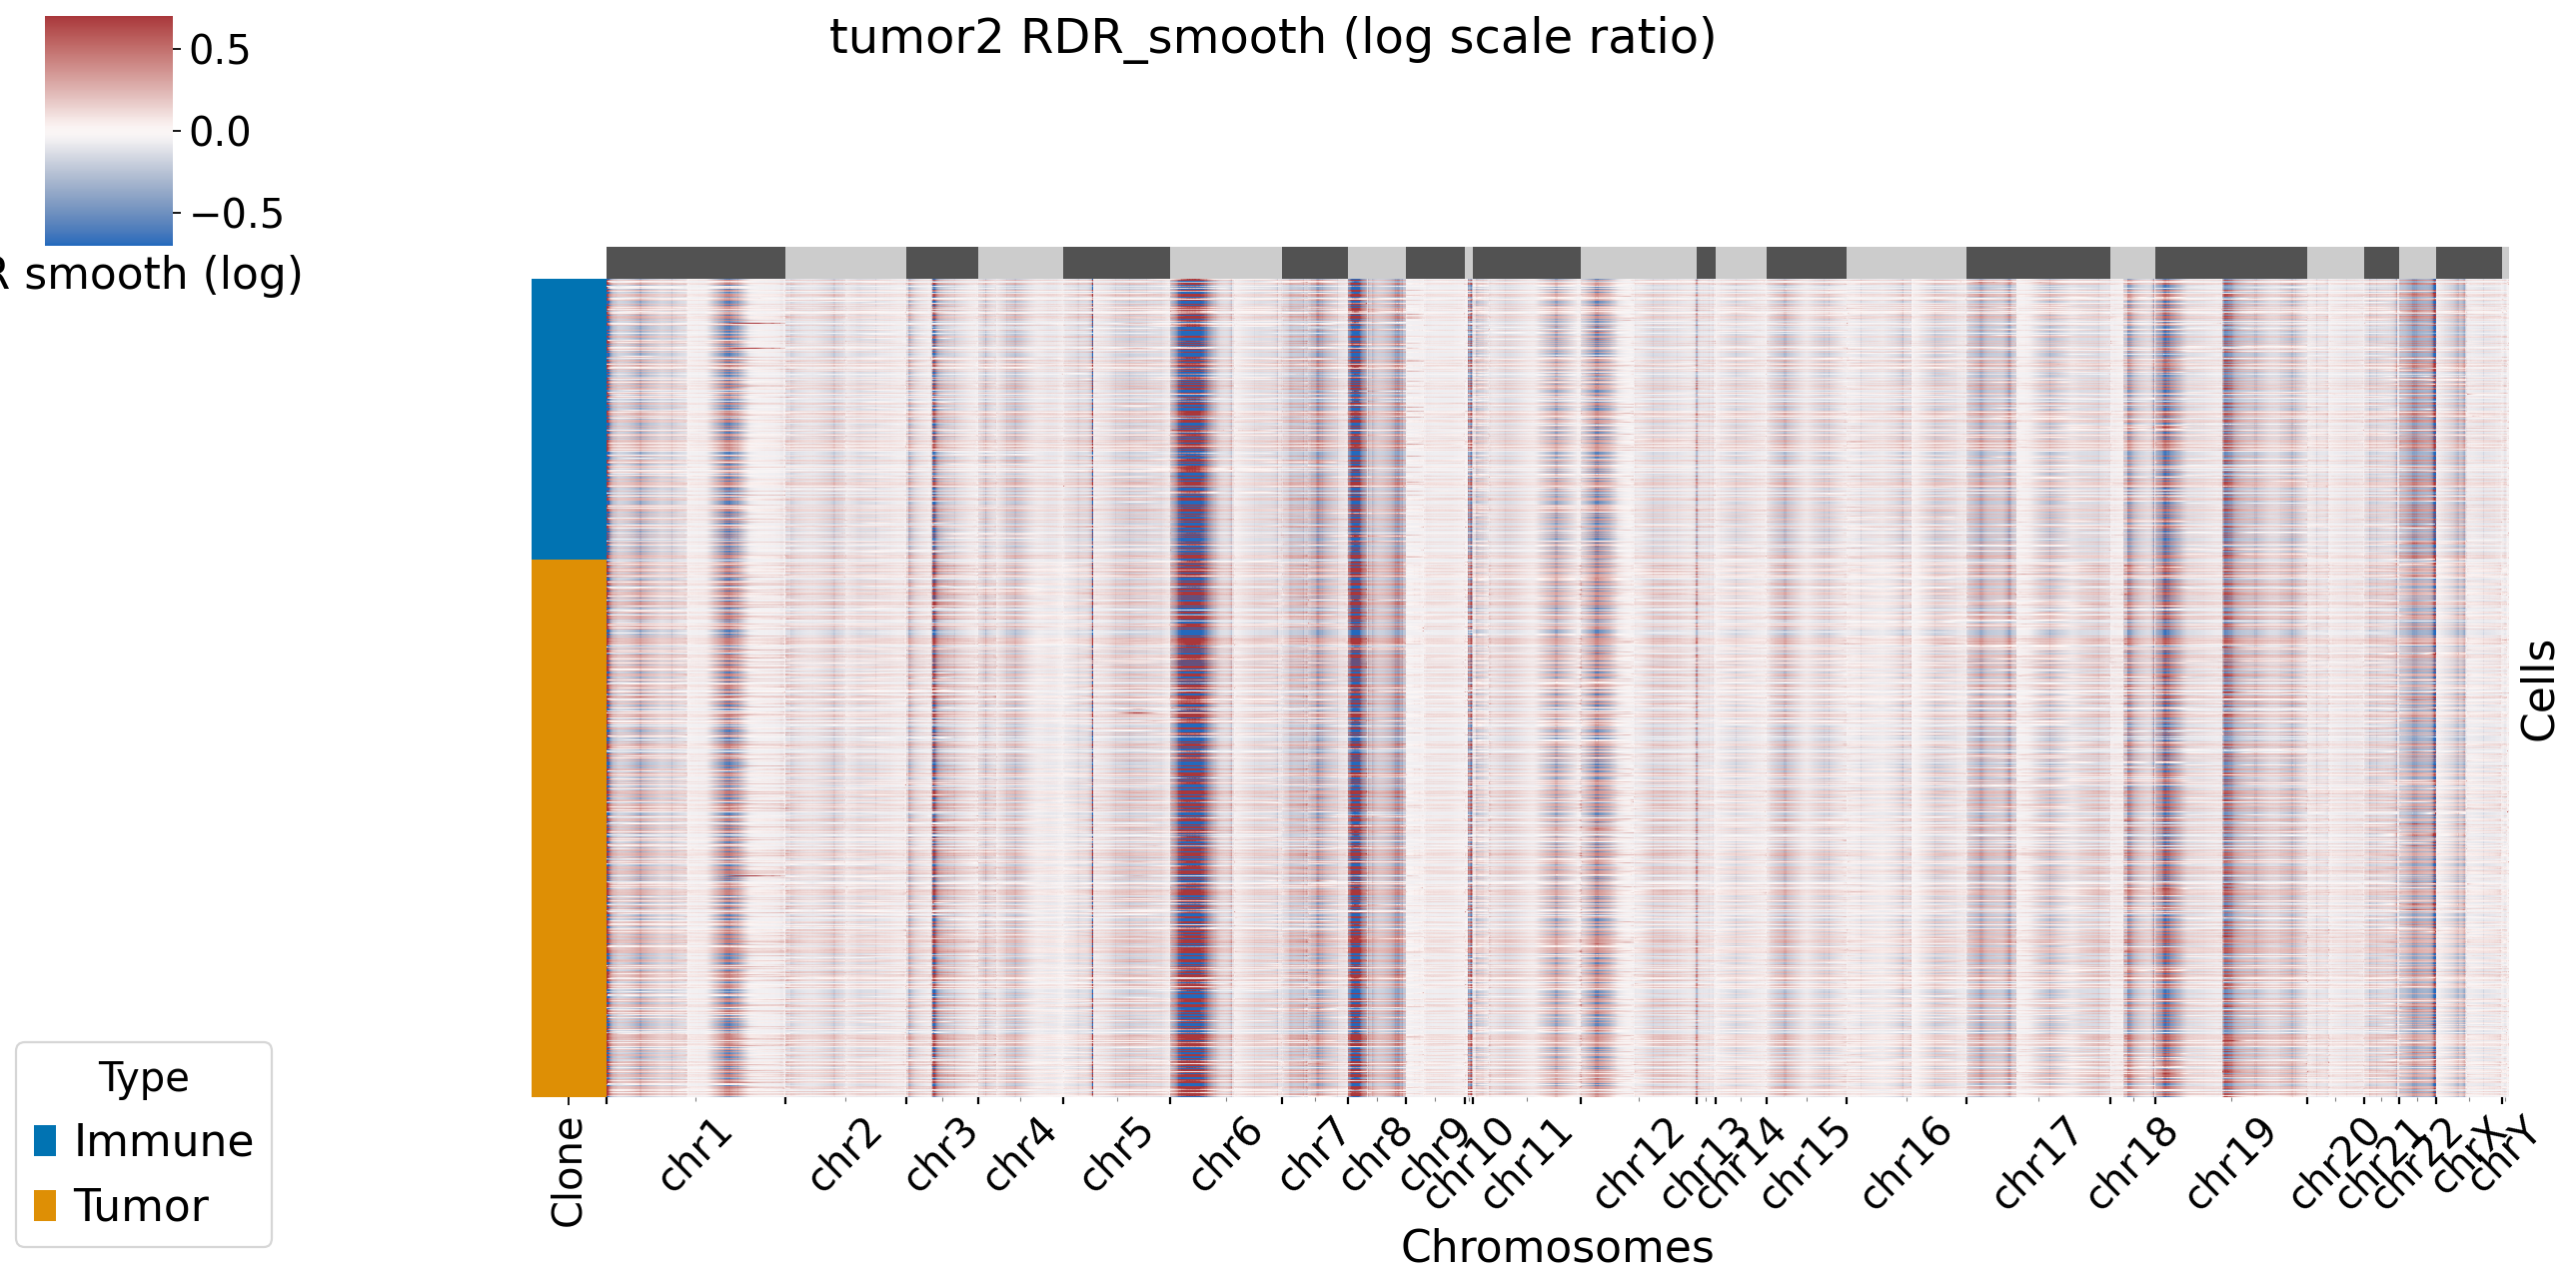

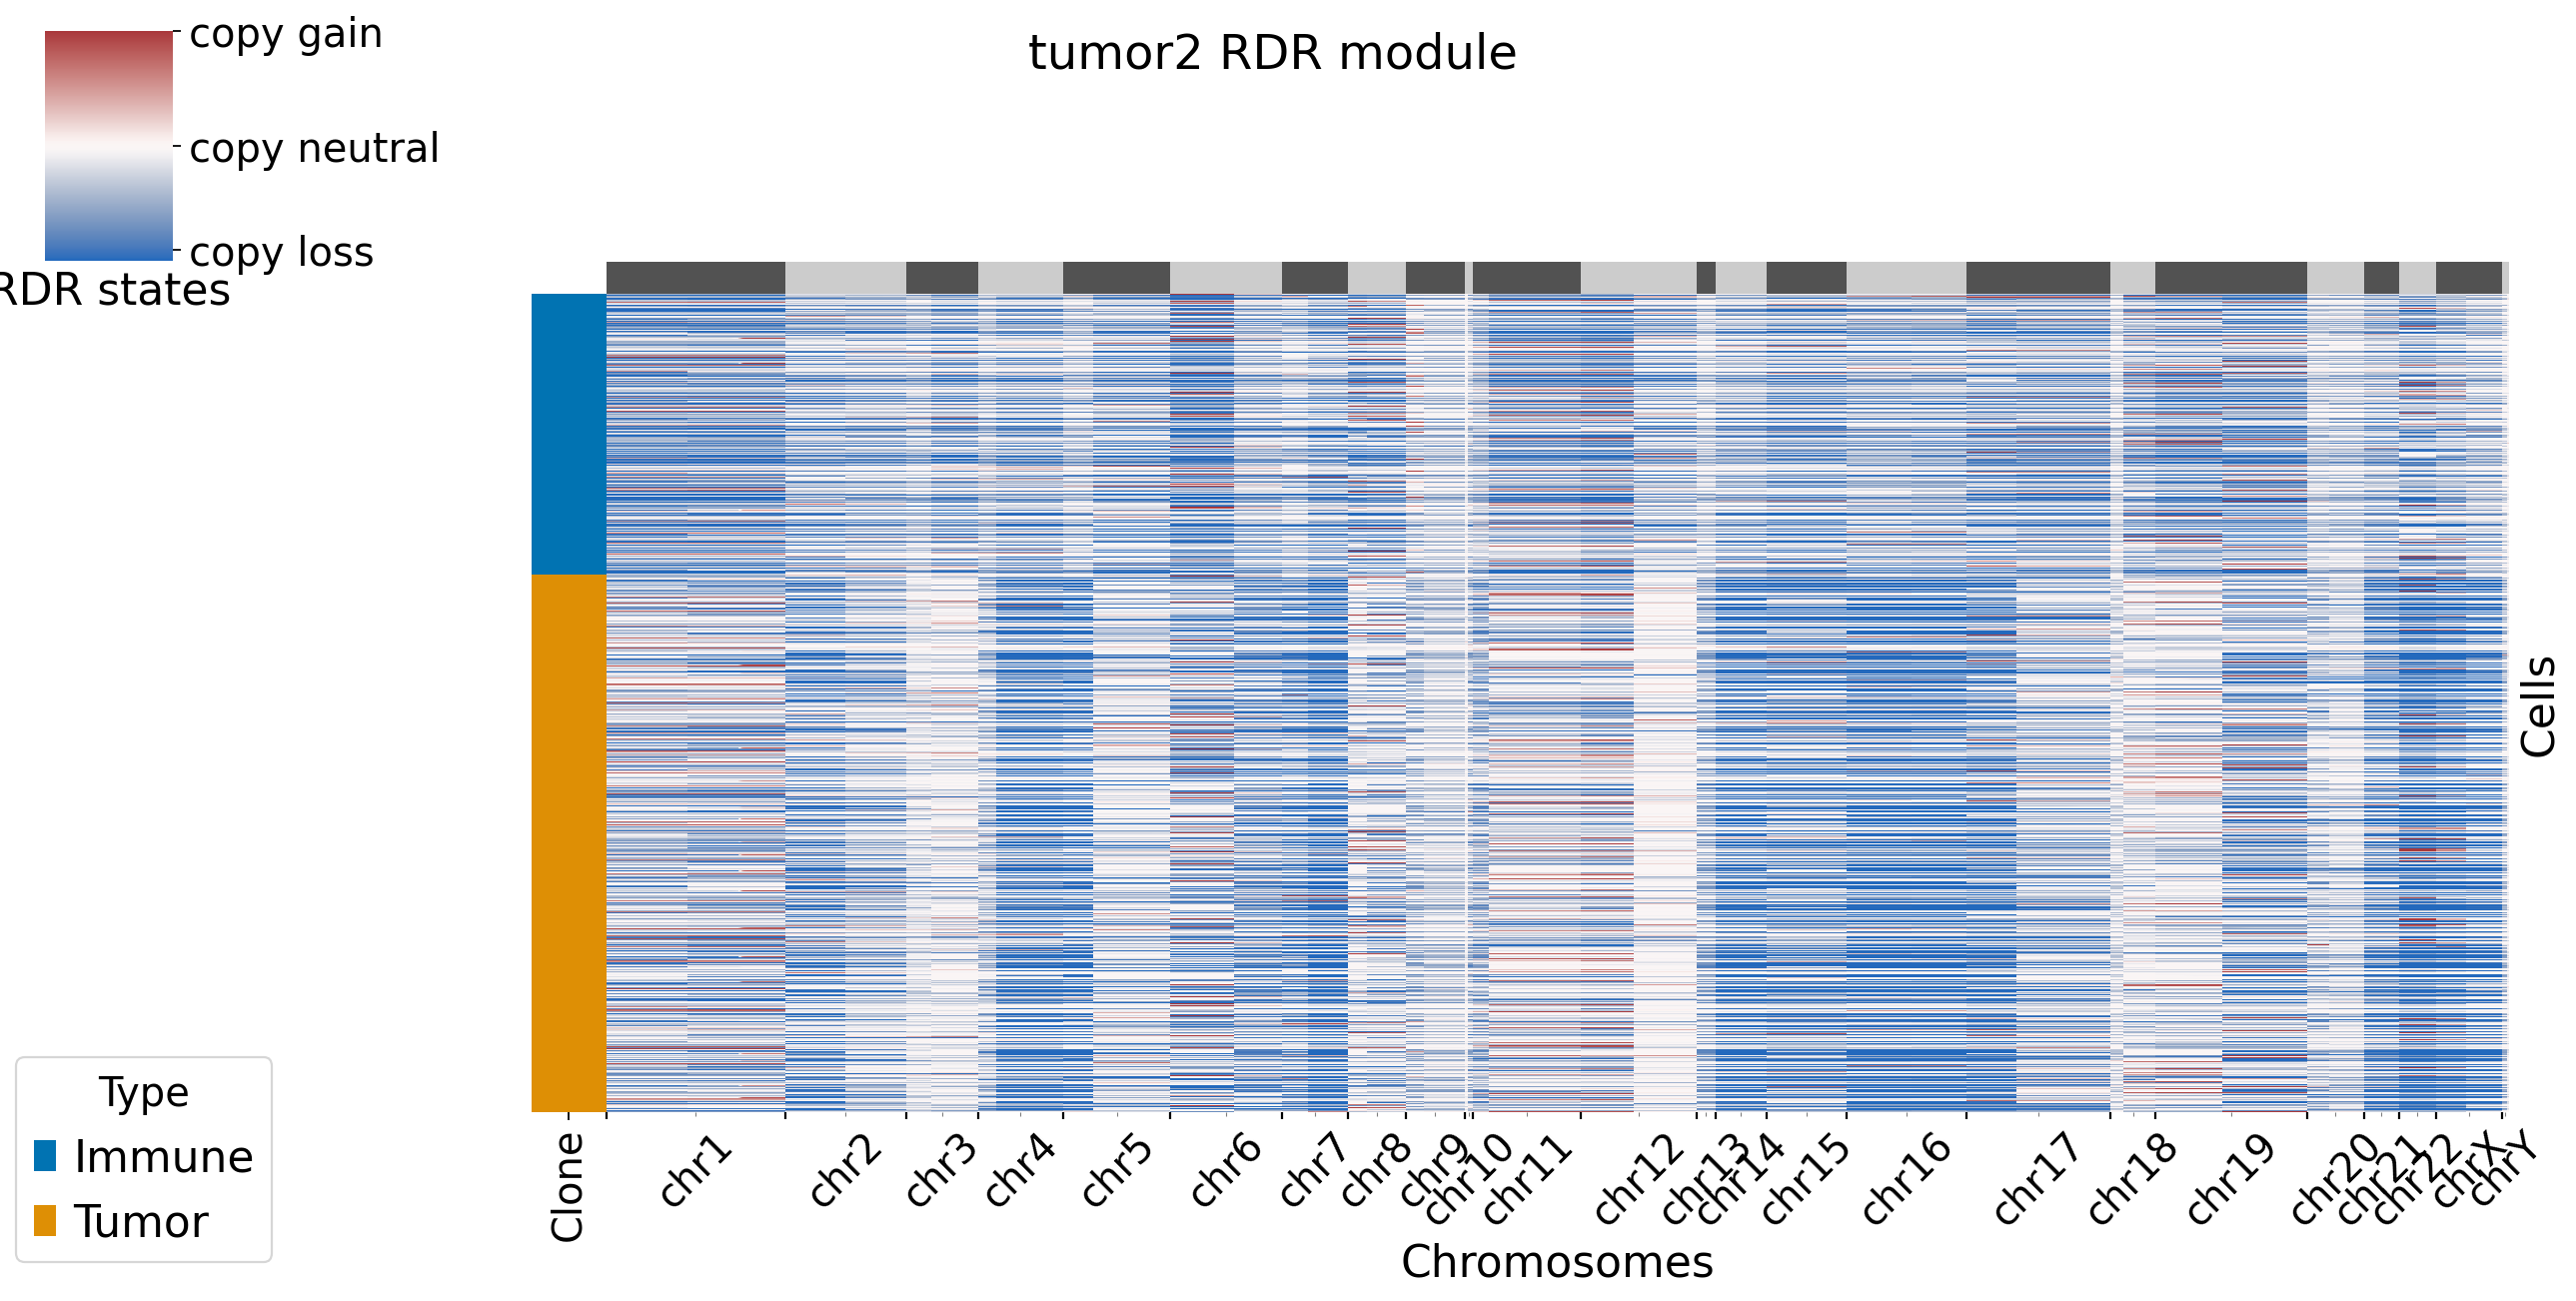

In [100]:
xconfig = xclone.XCloneConfig(dataset_name = "tumor2", module = "RDR", set_smartseq = False)
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_files/tumor2_outputs/rdr2"
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"
xconfig.top_n_marker = 25
xconfig.marker_group_anno_key = "cell_type"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.trans_t = 1e-6
xconfig.start_prob = np.array([0.3, 0.4, 0.3])


xconfig.display()

RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)

In [2]:
xconfig = xclone.XCloneConfig(dataset_name = "tumor2", module = "BAF", set_smartseq = False)
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_files/tumor2_outputs/baf2"
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"
xconfig.filter_ref_ave = None

xconfig.concentration = 35.5
xconfig.concentration_lower = 20
xconfig.concentration_upper = 100
xconfig.theo_neutral_BAF = 0.5

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.remove_guide_XY = False
xconfig.phasing_region_key = "chr"
xconfig.phasing_len = 100

xconfig.WMA_window_size = 6

xconfig.trans_t = 1e-6
xconfig.start_prob = np.array([0.2, 0.15,  0.3, 0.15, 0.2])

t = xconfig.trans_t
xconfig.trans_prob = np.array([[1-4*t, t, t, t,t],[t, 1-4*t, t, t,t],[t, t, 1-4*t, t,t], [t, t, t, 1-4*t, t], [t, t, t, t, 1-4*t]])
xconfig.CNV_N_components = 5

xconfig.BAF_denoise = True
xconfig.RDR_file = "/home/sc5625/xclone_files/tumor2_outputs/rdr2/data/RDR_adata_KNN_HMM_post.h5ad"


NameError: name 'xclone' is not defined

In [111]:
xconfig.display()


BAF 
Configurations:
BAF_add                        None
BAF_denoise                    True
BAF_denoise_GMM_comp           2
BAF_denoise_GMM_detection      True
BAF_denoise_cellprop_cutoff    0.05
CNV_N_components               5
HMM_brk                        chr_arm
HMM_nproc                      40
KNN_Xlayer                     fill_BAF_phased
KNN_connect_use_key            connectivities_expr
KNN_neighbors                  10
KNN_npcs                       40
RDR_file                       /home/sc5625/xclone_files/tumor2_outputs/rdr2/data/RDR_adata_KNN_HMM_post.h5ad
WMA_smooth_key                 chr_arm
WMA_window_size                6
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_files/tumor2_outputs/baf2
_plot_suffix                   
_start                         1750624351.2711704
_vector_friendly               True
baf_bias_mode                  1
bin_nproc    

[XClone BAF module running]************************
[XClone data preprocessing] check BAF raw dataset value: success
Keep valid cells: Filter out 0 cells / 3640 total cells, remain 3640 valid cells with annotation
[XClone data preprocessing] check BAF cell annotation: success
[XClone data checking]: RDR and BAF in same cell order.
[XClone-data removing]:
Filter out 50 genes / 32696 total genes, remain 32646 regions
[XClone-Local_phasing] time_used: 40.92seconds
[XClone hint] get allele flip status from local phasing.
[XClone hint] get allele flip status from global phasing.
[XClone hint] get final allele flip status.
[XClone-Global_phasing] time_used: 4.04seconds
make WMA connectivities matrix, saved in varp[WMA_connect].
WMA_connect exists for direct use.
[XClone get_CNV_states] time_used: 63.04seconds
correct BAF CNV guiding copy loss-B ratio
correct BAF CNV guiding copy loss-A ratio
correct BAF CNV guiding copy gain-A ratio
correct BAF CNV guiding copy gain-B ratio
states used: [0.1

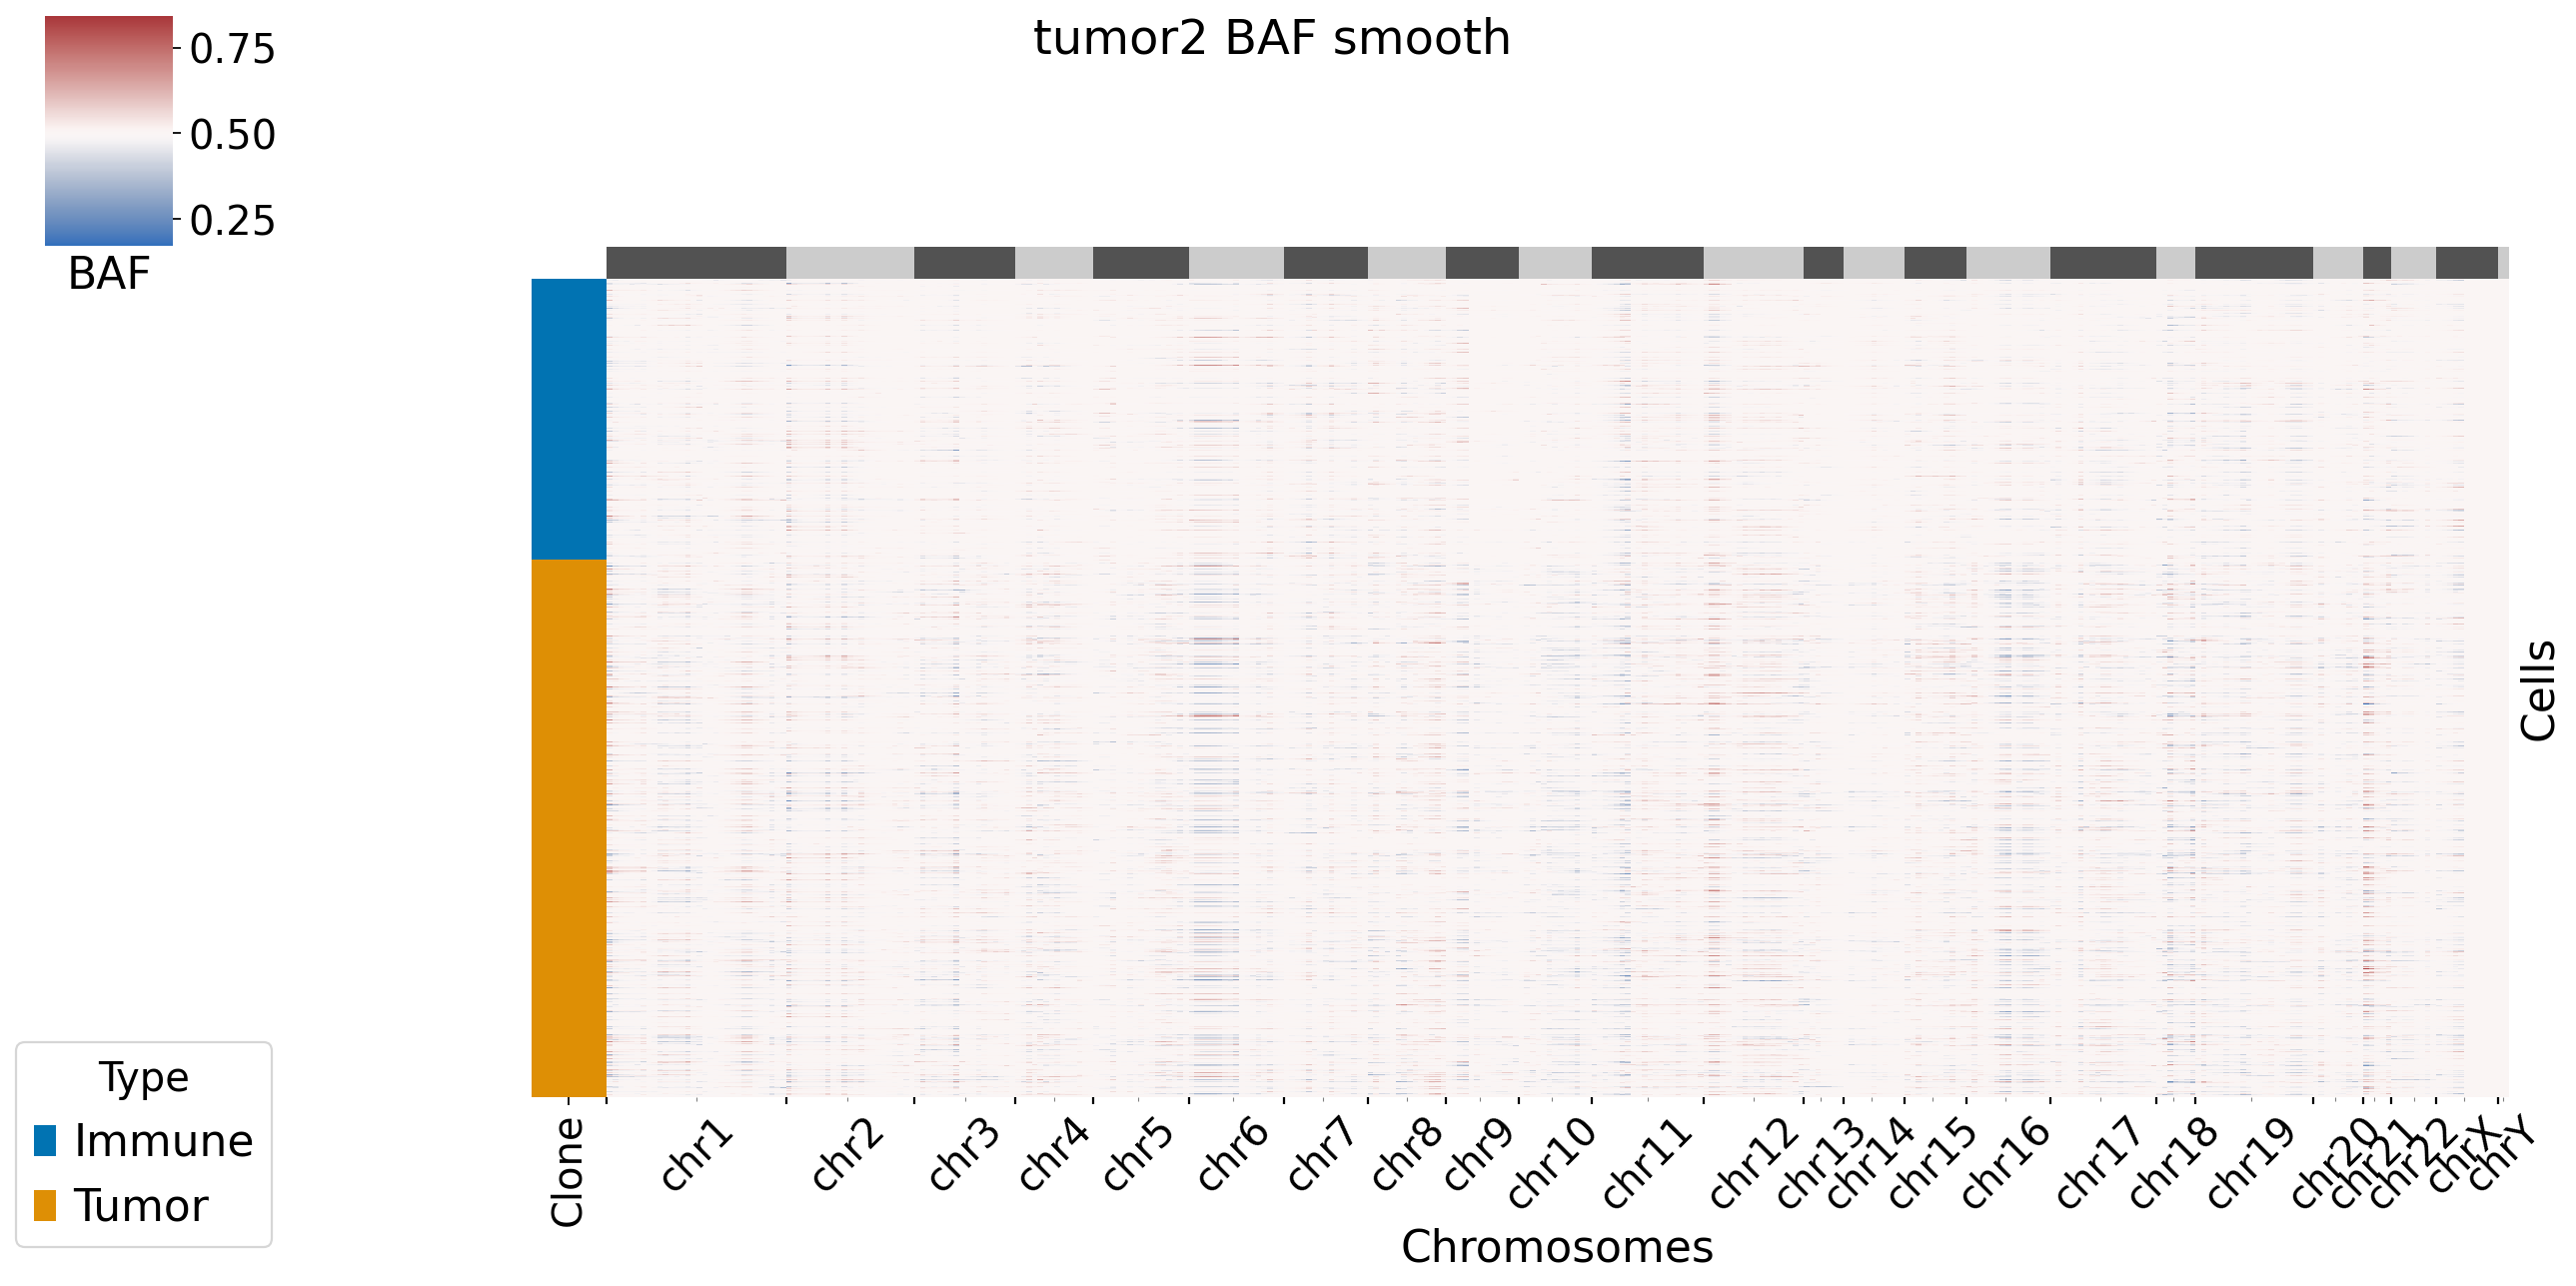

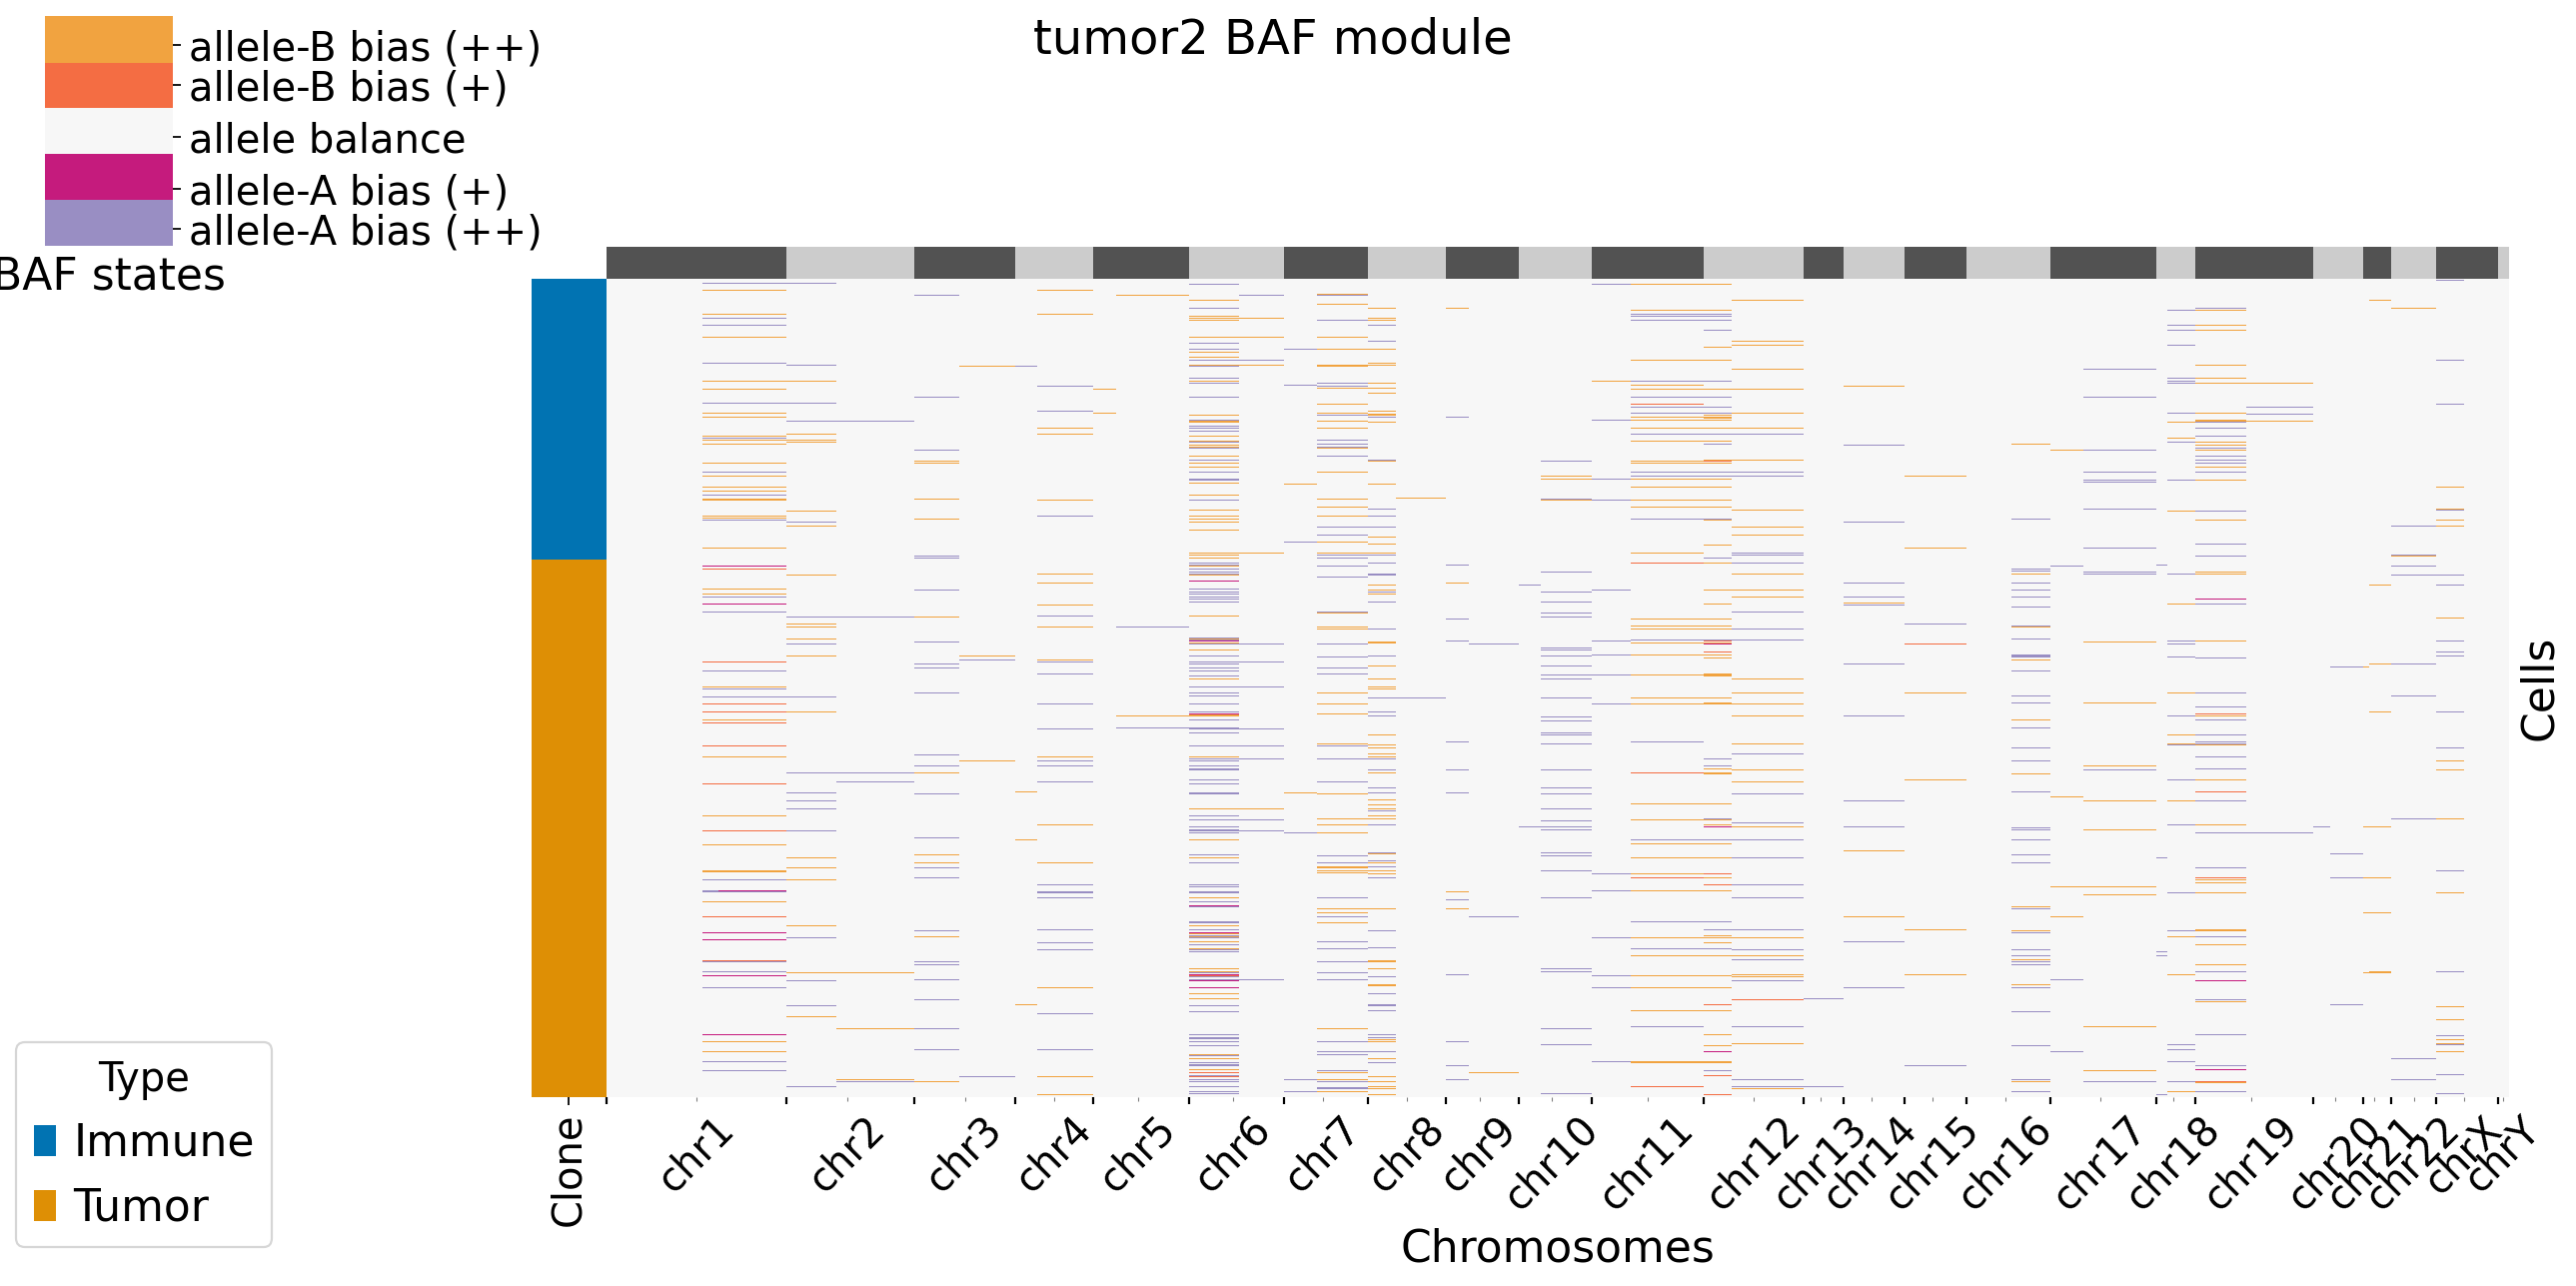

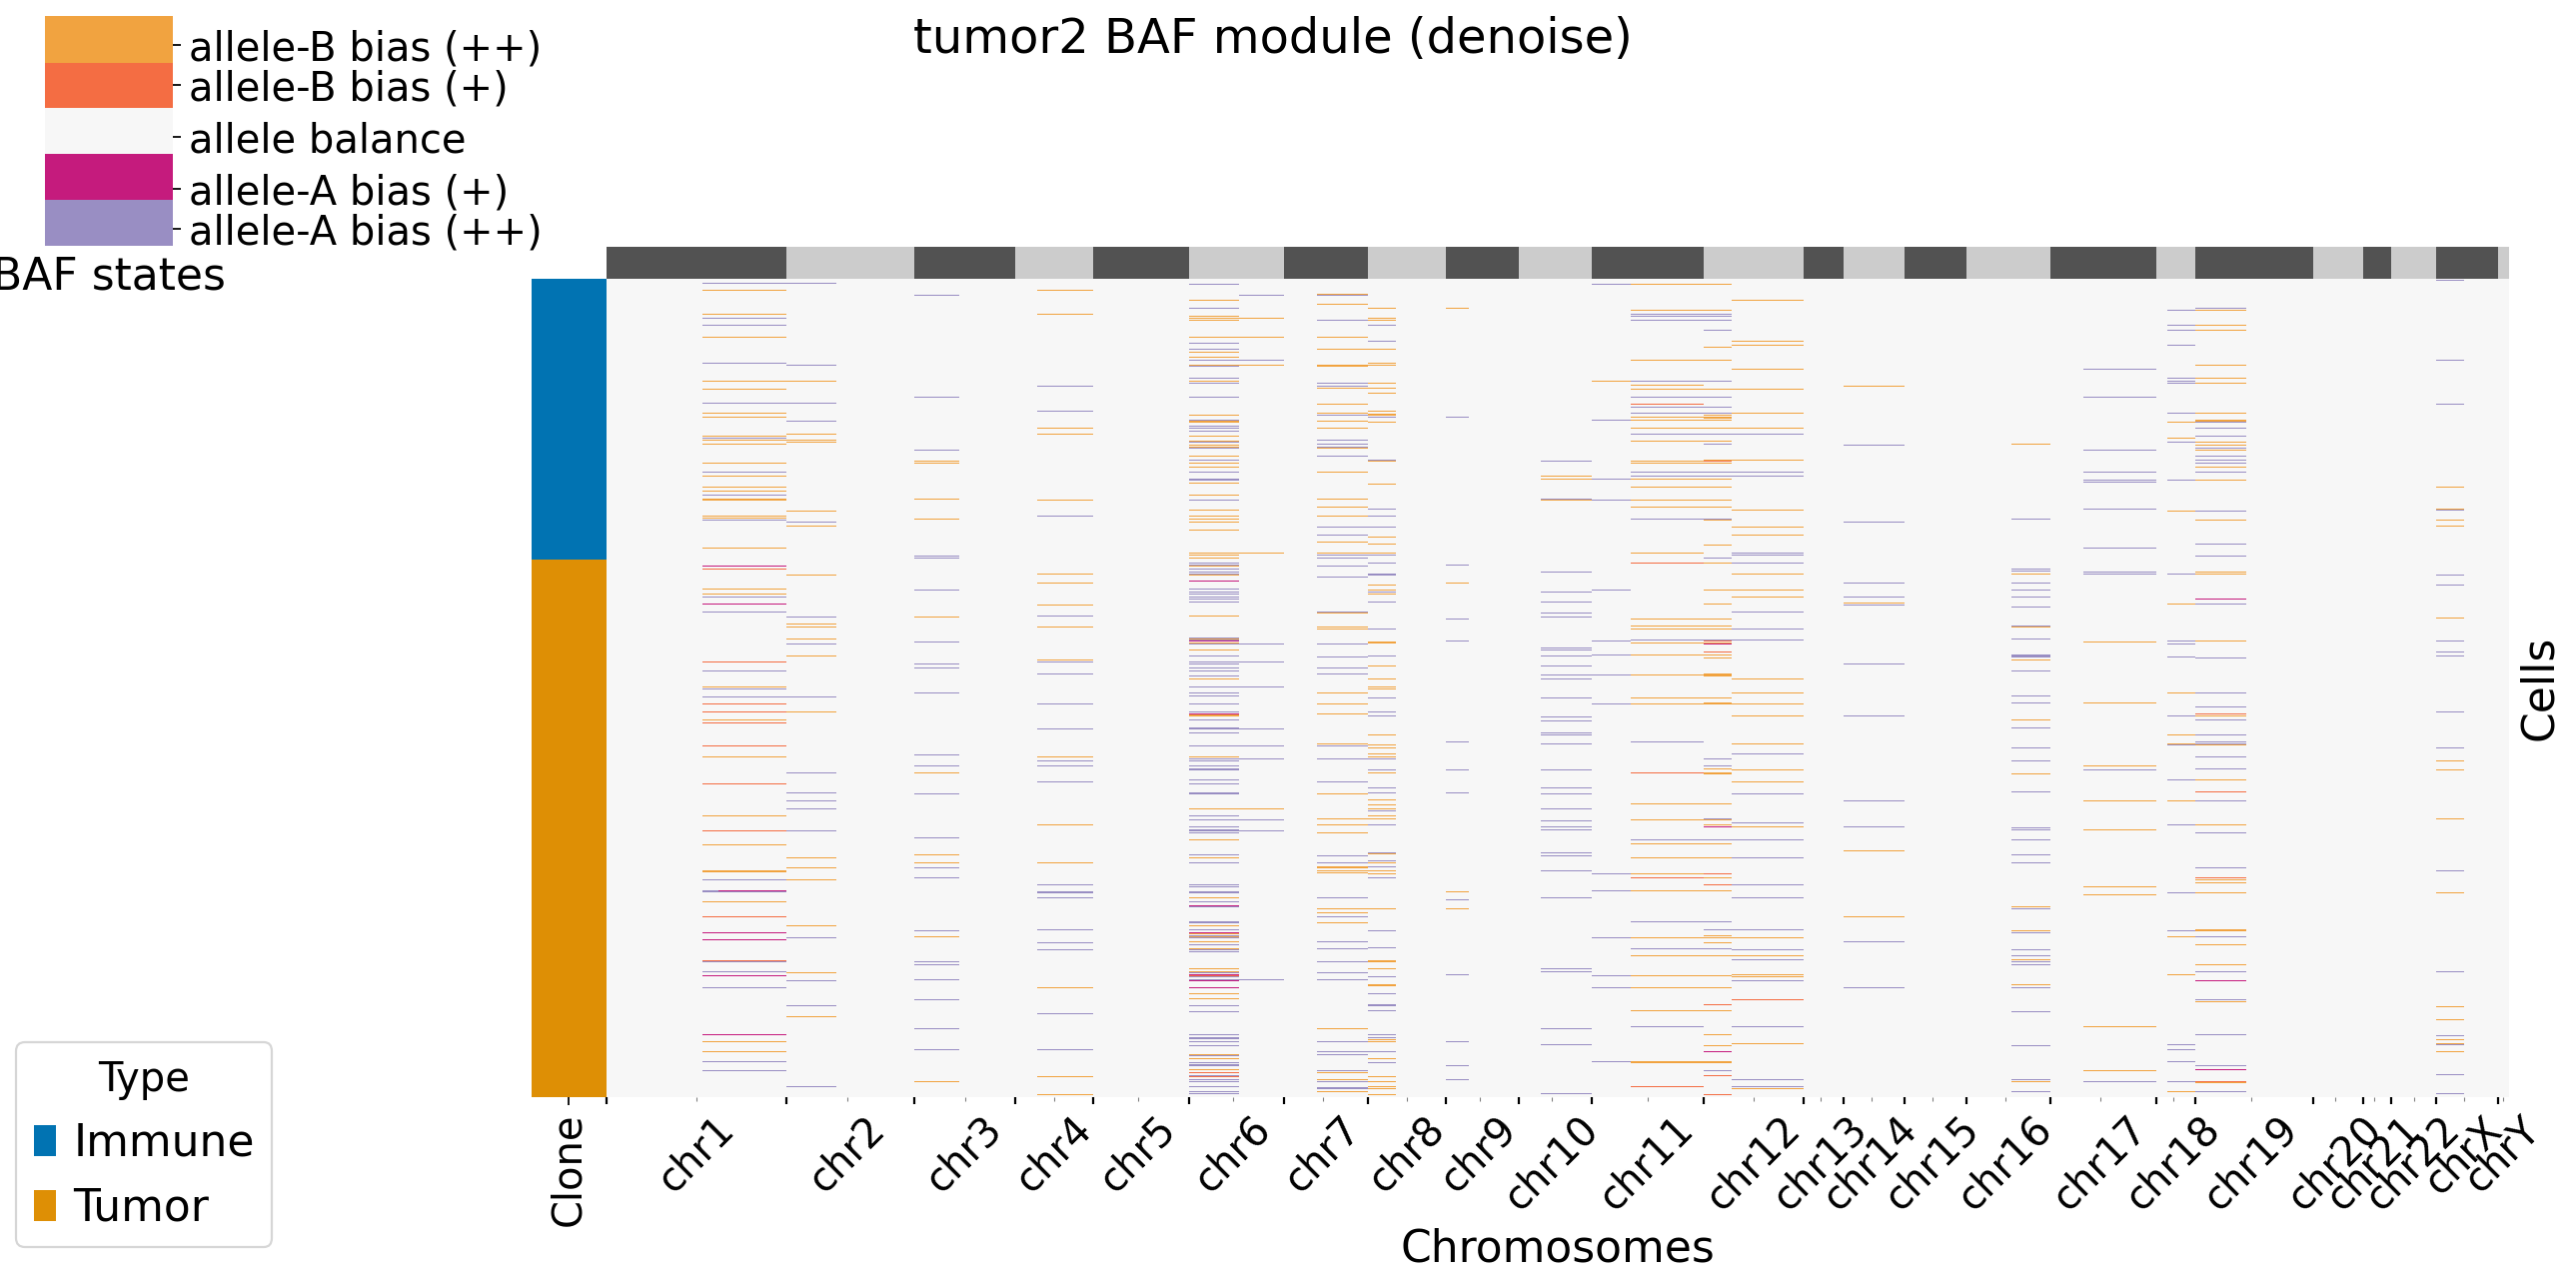

In [112]:
BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)

In [113]:
xconfig = xclone.XCloneConfig(dataset_name = "tumor2", module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/home/sc5625/xclone_files/tumor2_outputs/combine2"

xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"


xconfig.copygain_correct= False

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Type"
xconfig.merge_loss = False
xconfig.merge_loh = True

xconfig.BAF_denoise = True
xconfig.display()


Combine 
Configurations:
BAF_denoise                    True
KNN_neighbors                  10
KNN_npcs                       40
RDR_denoise                    False
RDR_prior                      True
WGD_cell_prop_threshold        50
WGD_detect_genome_level        chr_arm
WGD_detection                  True
WGD_prop_value_threshold       0.9
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /home/sc5625/xclone_files/tumor2_outputs/combine2
_plot_suffix                   
_start                         1750624887.73177
_vector_friendly               True
cell_anno_key                  cell_type
copygain_correct               False
copygain_correct_mode          None
copyloss_correct               True
copyloss_correct_mode          1
customizedplotting             False
dataset_name                   tumor2
develop_mode                   False
exclude_XY                     False
file_format_data  

In [114]:
BAF_merge_Xdata

AnnData object with n_obs × n_vars = 2806 × 340
    obs: 'matched_name', 'Type', 'cell_type'
    var: 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'gene1_stop', 'bin_stop_arm', 'bin_stop_chr_arm', 'bin_stop_band', 'bin_idx', 'bin_idx_cum', 'GeneName_lst', 'GeneID_lst', 'bin_genes_cnt', 'theo_neutral_BAF'
    uns: 'local_phasing_key', 'local_phasing_len'
    layers: 'BAF', 'BAF_phased', 'fill_BAF_phased', 'BAF_phased_KNN', 'BAF_phased_KNN_WMA', 'BAF_phased_WMA', 'posterior_mtx', 'posterior_mtx_log', 'denoised_posterior_mtx'
    obsp: 'connectivities_expr'
    varp: 'WMA_connect'

[XClone Combination module running]************************
[XClone] BAF extend bins to genes.
[XClone data checking]: RDR and BAF in same cell order.
No genes in this bin: 5405 5408 , skip this bin.
No genes in this bin: 7111 7138 , skip this bin.
No genes in this bin: 11760 11796 , skip this bin.
No genes in this bin: 13197 13227 , skip this bin.
No genes in this bin: 15662 15762 , skip this bin.
No genes in this bin: 15762 15801 , skip this bin.
No genes in this bin: 15901 16001 , skip this bin.
No genes in this bin: 16201 16301 , skip this bin.
No genes in this bin: 16301 16401 , skip this bin.
No genes in this bin: 17068 17168 , skip this bin.
No genes in this bin: 17268 17368 , skip this bin.
No genes in this bin: 31520 31522 , skip this bin.
No genes in this bin: 32684 32784 , skip this bin.
[XClone WGD detection performing]
[XClone Warning] WGD warning,pls check RDR and BAF module for double comfirmation.
[XClone hint] combine_final_file saved in /home/sc5625/xclone_files/tumor

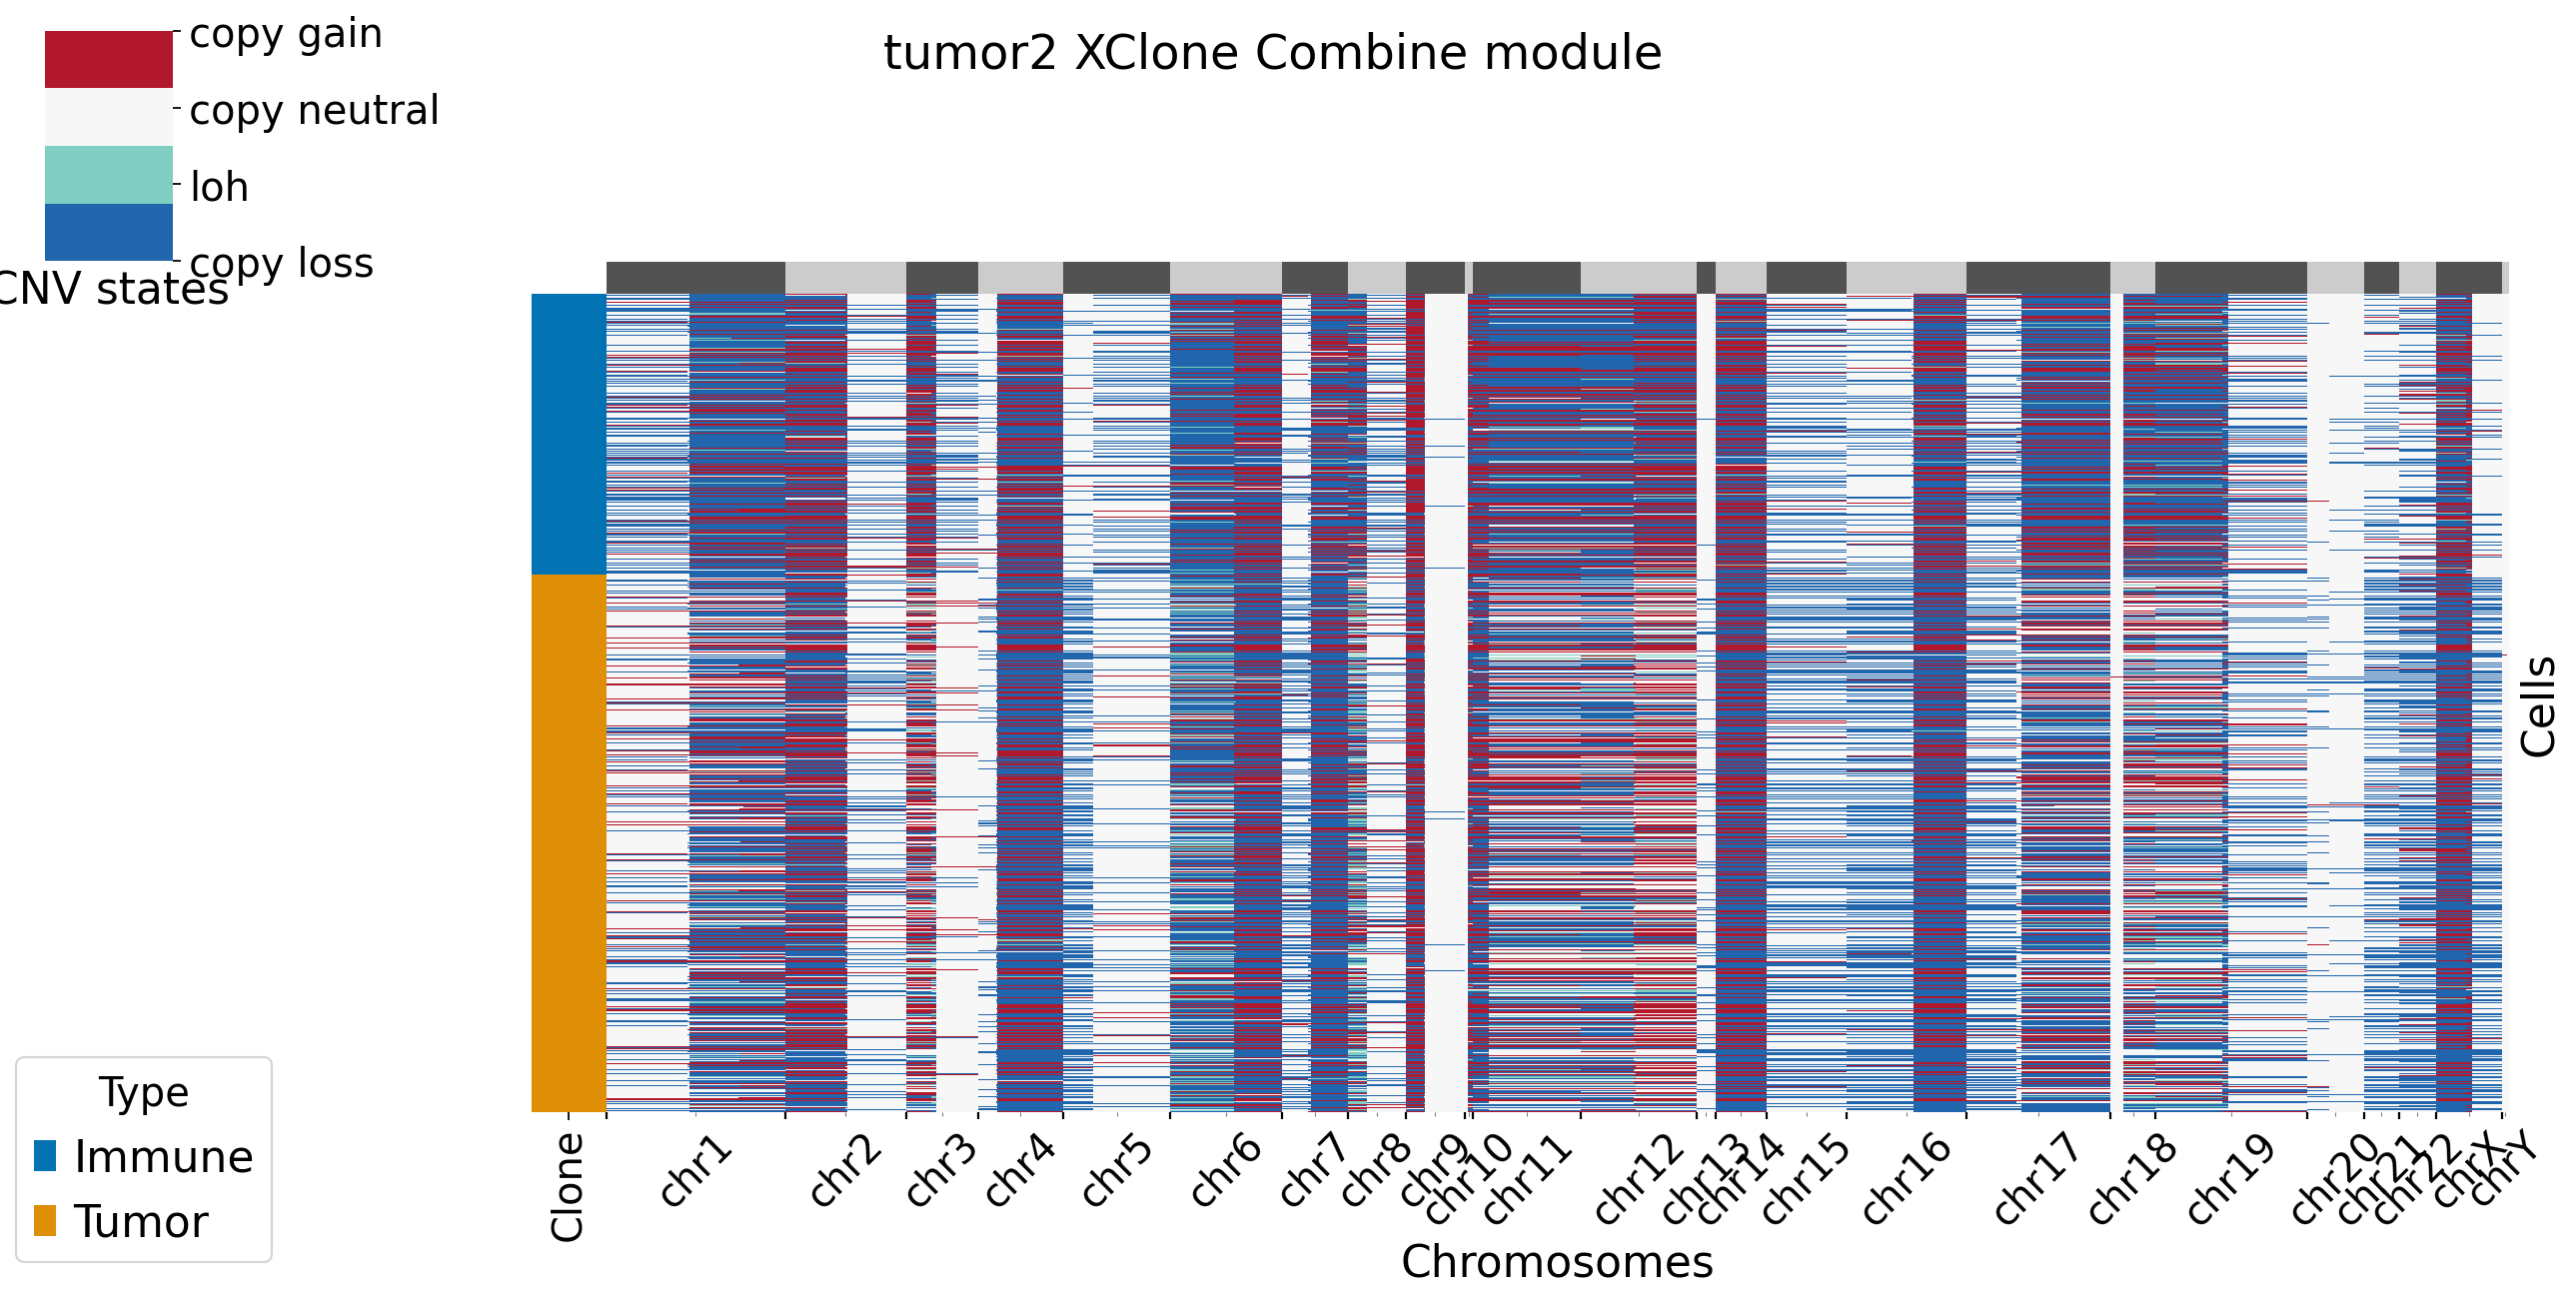

In [118]:
combine_Xdata = xclone.model.run_combine(RDR_Xdata,
                BAF_merge_Xdata,
                verbose = True,
                run_verbose = True,
                config_file = xconfig)